Installations for the virtual environments

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install altair
!pip install seaborn
!pip install matplotlib

IMPORTS

In [ ]:
import seaborn as sns
import altair as alt
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel("C:\\Users\\jyoti\\OneDrive\\Desktop\\JYOTI CMU Docs\\SUDS\\Data for NCH.xlsx")

Load the dataset into DataFrame and view the data

In [ ]:
data.head()

,Number,Month Seen,Year Seen,Child Age,Child Gender,Child Race,Type of Abuse,Offender Age,Offender Race,Disclosure
0,1,March,2018,10,M,White,Sexual Abuse,NaN,NaN,No
1,2,January,2018,10,F,White,Other,NaN,NaN,NaN
2,3,April,2018,11,F,White,Sexual Abuse,NaN,NaN,NaN
3,4,March,2018,16,F,Multi-Race,Sexual Abuse,NaN,NaN,NaN
4,5,April,2018,7,F,White,Sexual Abuse,NaN,NaN,NaN


List of columns in the data

In [ ]:
print(data.columns)

Index(['Number', 'Month Seen', 'Year Seen', 'Child Age', 'Child Gender',
       'Child Race', 'Type of Abuse ', 'Offender Age', 'Offender Race',
       'Disclosure'],
      dtype='object')


Analyze the Aggregate statics for each column and visualize the data distribution for the columns

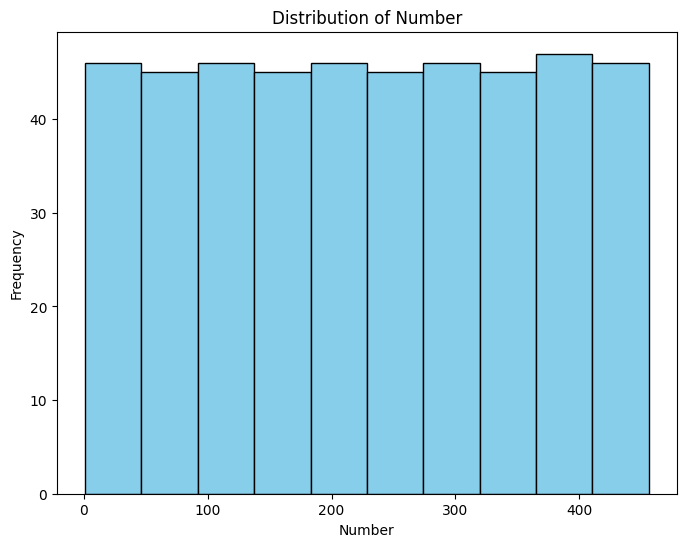

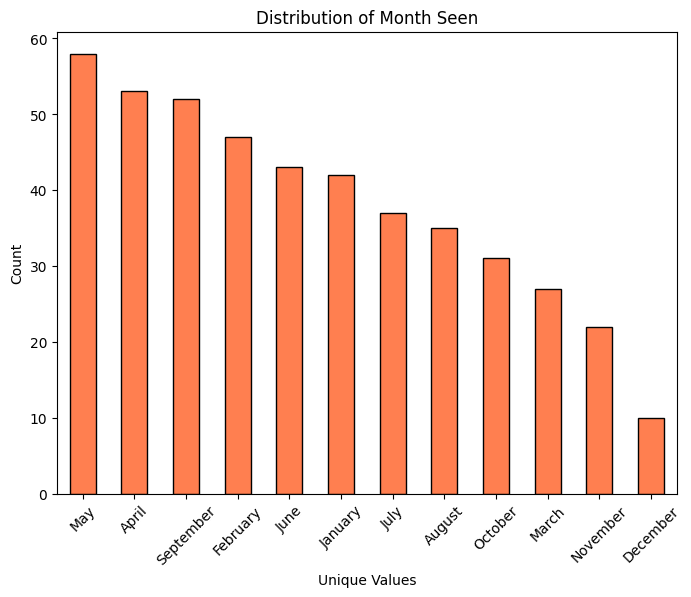

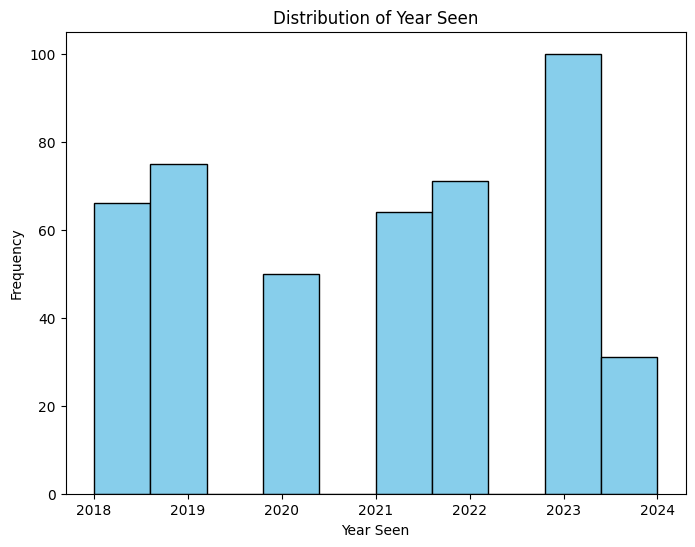

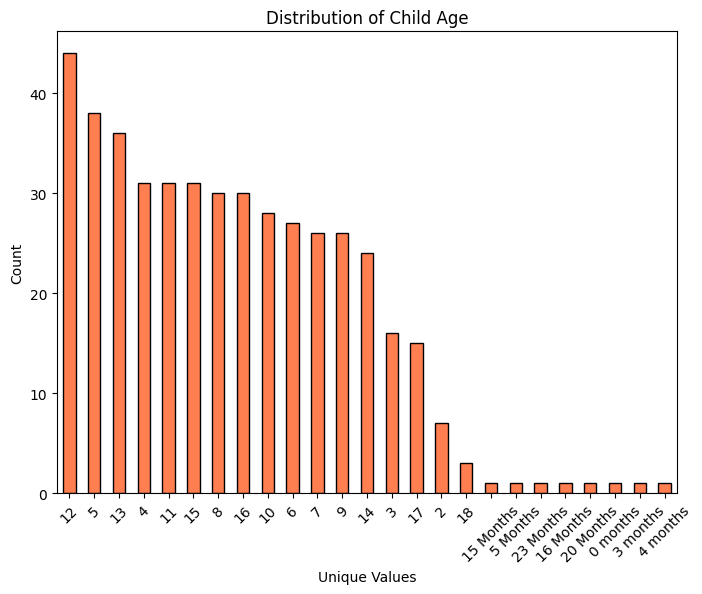

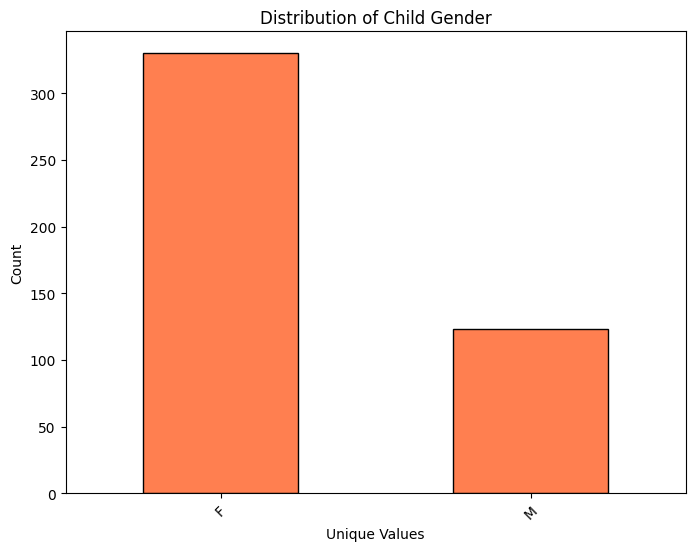

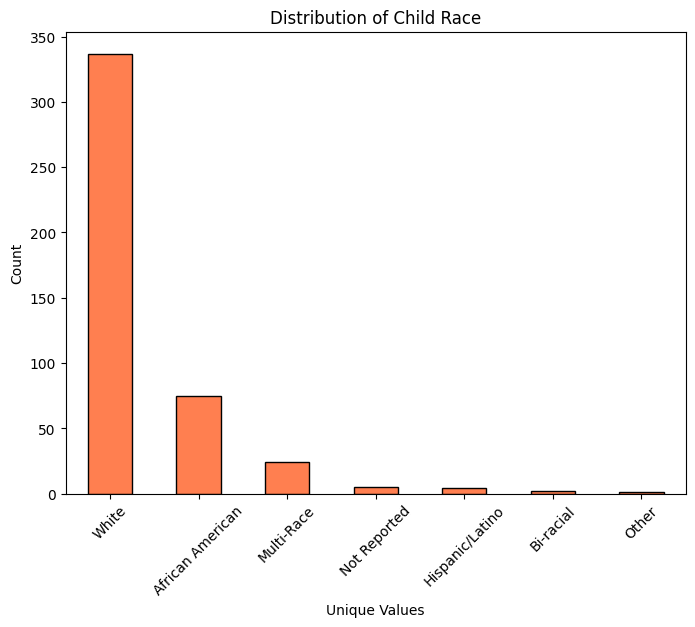

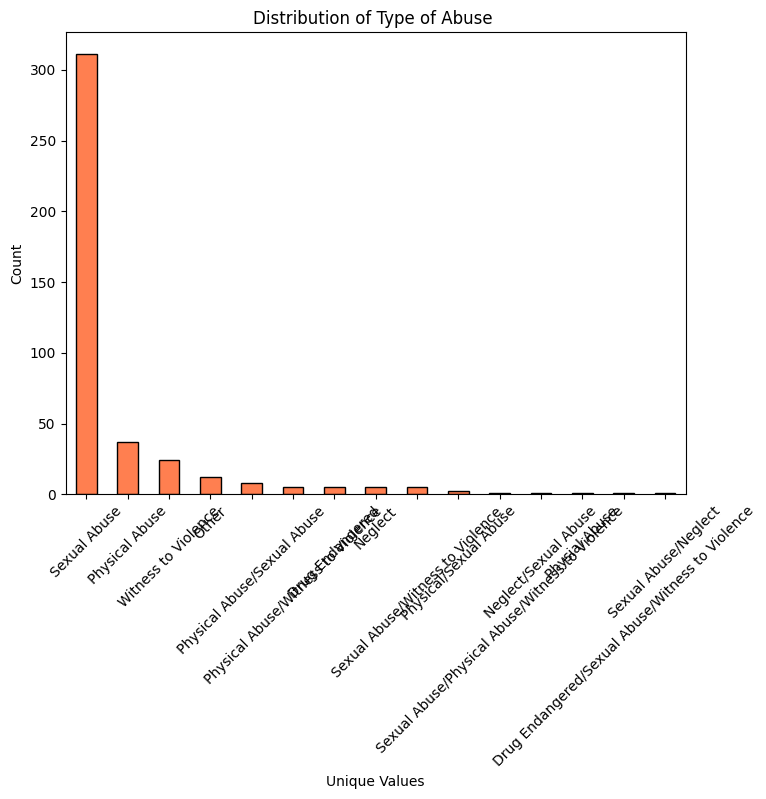

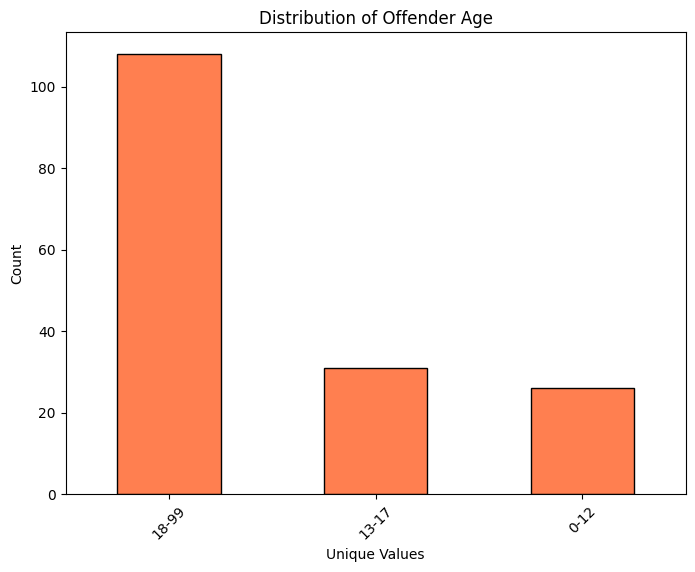

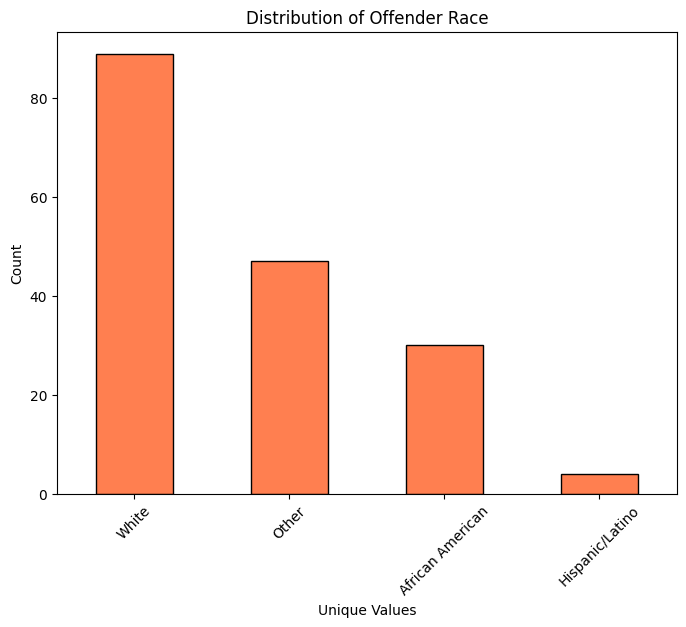

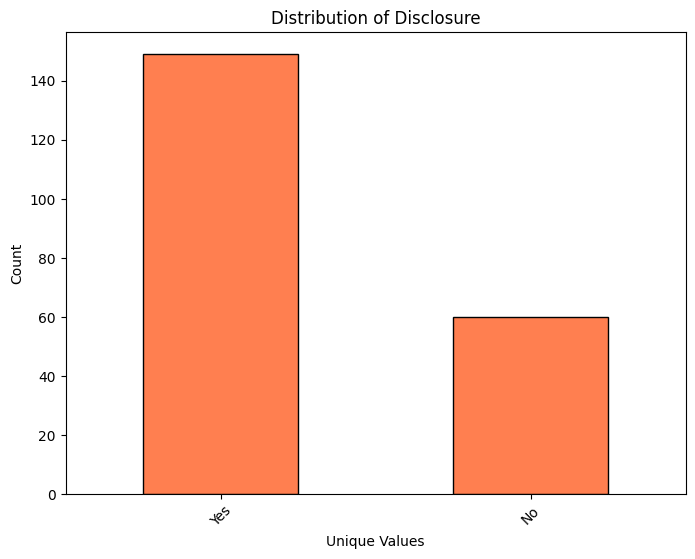

               Data Type Null Count Unique Values Max Value Min Value  \
Number             int64          0           456       456         1   
Month Seen        object          0            12       NaN       NaN   
Year Seen          int64          0             7      2024      2018   
Child Age         object          6            25       NaN       NaN   
Child Gender      object          4             2       NaN       NaN   
Child Race        object          9             7       NaN       NaN   
Type of Abuse     object         38            15       NaN       NaN   
Offender Age      object        292             3       NaN       NaN   
Offender Race     object        287             4       NaN       NaN   
Disclosure        object        248             2       NaN       NaN   

                 Mean Value                                 Most Common Values  
Number           228.884026                 {404: 2, 456: 1, 1: 1, 2: 1, 3: 1}  
Month Seen              NaN  {'May

In [ ]:
dataCopy=data.copy(deep=True)
column_distributions = {}
for col in dataCopy.columns :
    col_data = dataCopy[col]

    # Determine column data type and prepare summary statistics accordingly
    if pd.api.types.is_numeric_dtype(col_data):
        # For numeric columns, calculate min, max, mean, and top values
        col_summary = {
            "Data Type": col_data.dtype,
            "Null Count": col_data.isnull().sum(),
            "Unique Values": col_data.nunique(),
            "Max Value": col_data.max(),
            "Min Value": col_data.min(),
            "Mean Value": col_data.mean(),
            "Most Common Values": col_data.value_counts().head(5).to_dict()  # Top 5 common values
        }

        plt.figure(figsize=(8, 6))
        plt.hist(col_data.dropna(), bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    else:
        # For non-numeric columns, calculate top values and unique count
        col_summary = {
            "Data Type": col_data.dtype,
            "Null Count": col_data.isnull().sum(),
            "Unique Values": col_data.nunique(),
            "Most Common Values": col_data.value_counts().head(5).to_dict()  # Top 5 common values
        }
        unique_vals_count = col_data.value_counts()
        plt.figure(figsize=(8, 6))
        unique_vals_count.plot(kind='bar', color='coral', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Unique Values')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    # Store the summary for the column
    column_distributions[col] = col_summary

# Convert the dictionary to a DataFrame for a structured view
distributions_df = pd.DataFrame(column_distributions).T

# Display the results
print(distributions_df)


NOTES from the visualizations above -
Total data points 456.
Years for data - 7
1) April and May seem to be peak months where abuse takes place. (Further year-month analysis done below)
2) Our dataset has most datapoints for the year 2023, which can be due to discrepancy in data collection (INVESTIGATE)
3) Children of age 12, 5 and 13 seem to be the most targetted age group of children
4) Female children are MORE LIKELY TO BE ABUSED than Male children.
5) Sexual and Physical Abuse are the major categories of abuse taking place according to our dataset.
6) White children are more likely to be abused
7) The offenders are also mostly white

Personal Notes - The data is very skewed due to multiple reasons.
We would need to investigate why these peaks exist and if there is a discrepancy in data collection. Compare with the existing higher governmenet level datasets to verify if these patterns exist there as well to find conclusive evidence for patterns observed.

#TODO: GROUP AGE OF CHILDREN TO MAKE IT MORE UNDERSTANDABLE.
#TODO : Group year wise to see actual year wise trends.
#TODO: Fix the orientation and presentation of the graph.
#TODO : Combine Age and type of violence
#TODO : Other combinations of correlations between the columns.

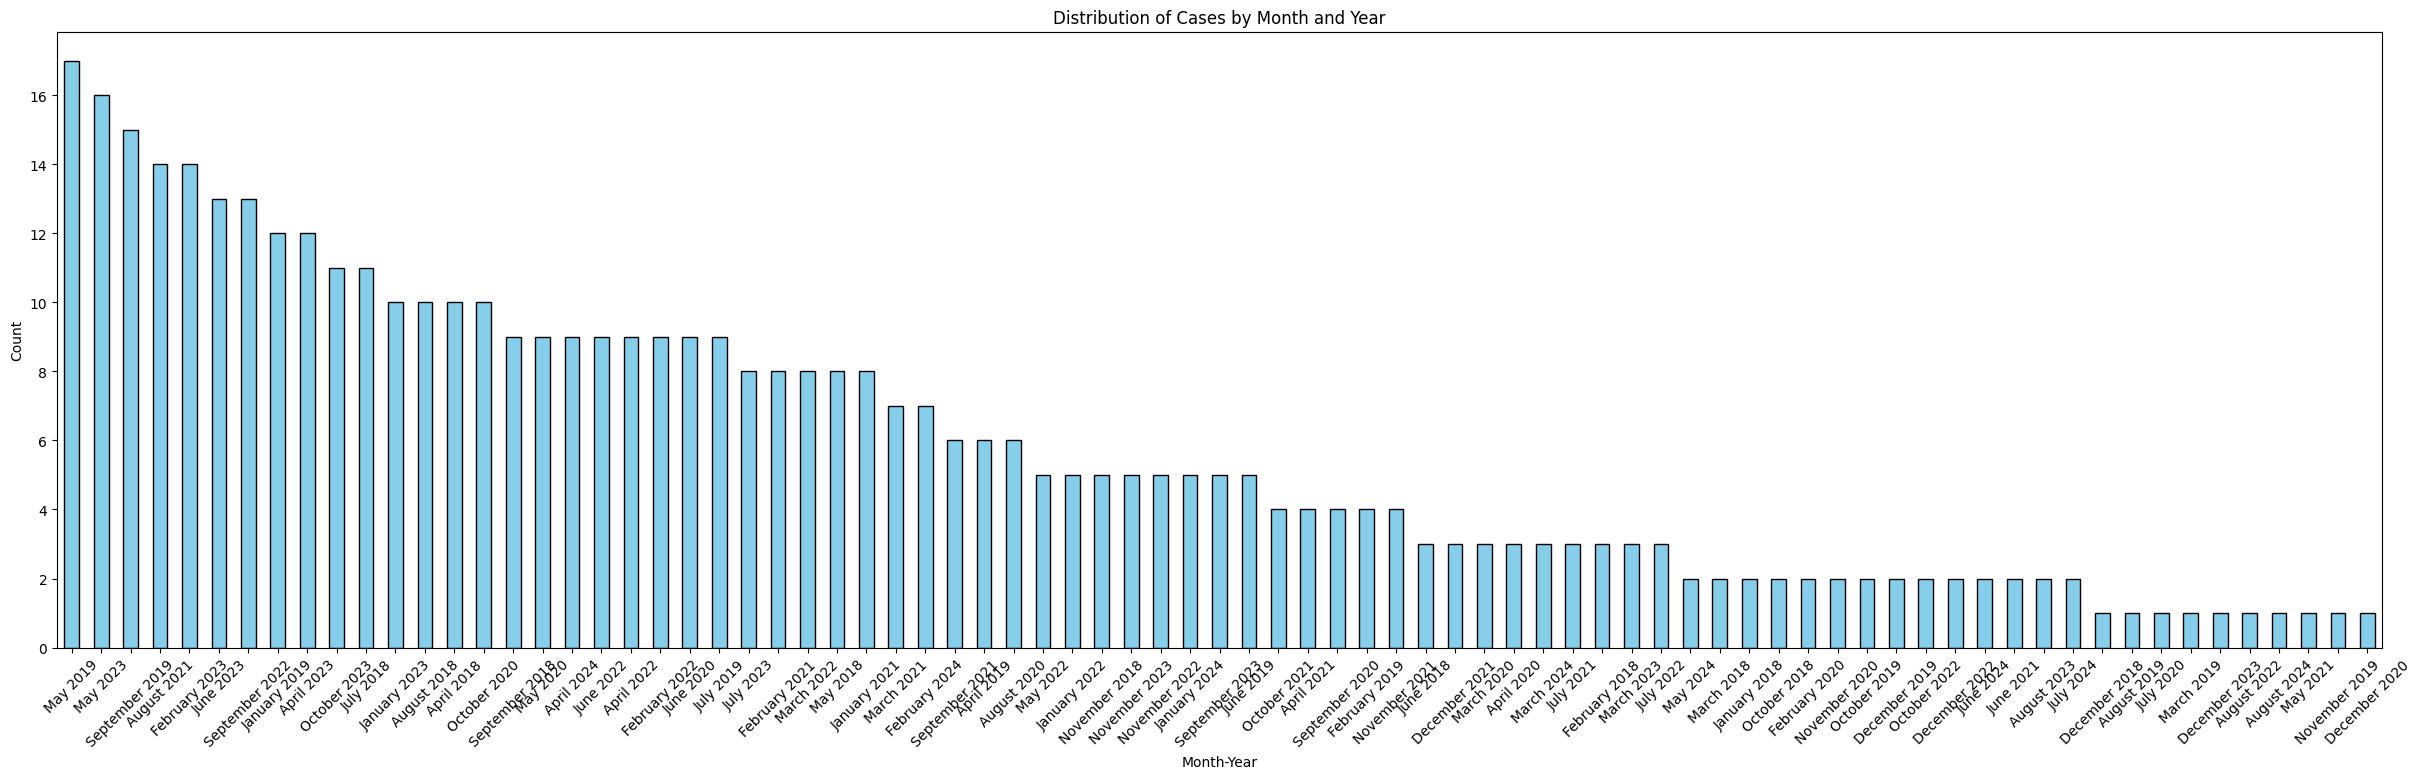

In [ ]:
# Create a combined 'Month-Year' column
dataCopy['Month-Year'] = dataCopy['Month Seen'] + ' ' + dataCopy['Year Seen'].astype(str)

# Calculate distribution for each 'Month-Year' combination
month_year_distribution = dataCopy['Month-Year'].value_counts().sort_values(ascending=False)

# Plot the distribution
plt.figure(figsize=(30, 8))
month_year_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cases by Month and Year')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

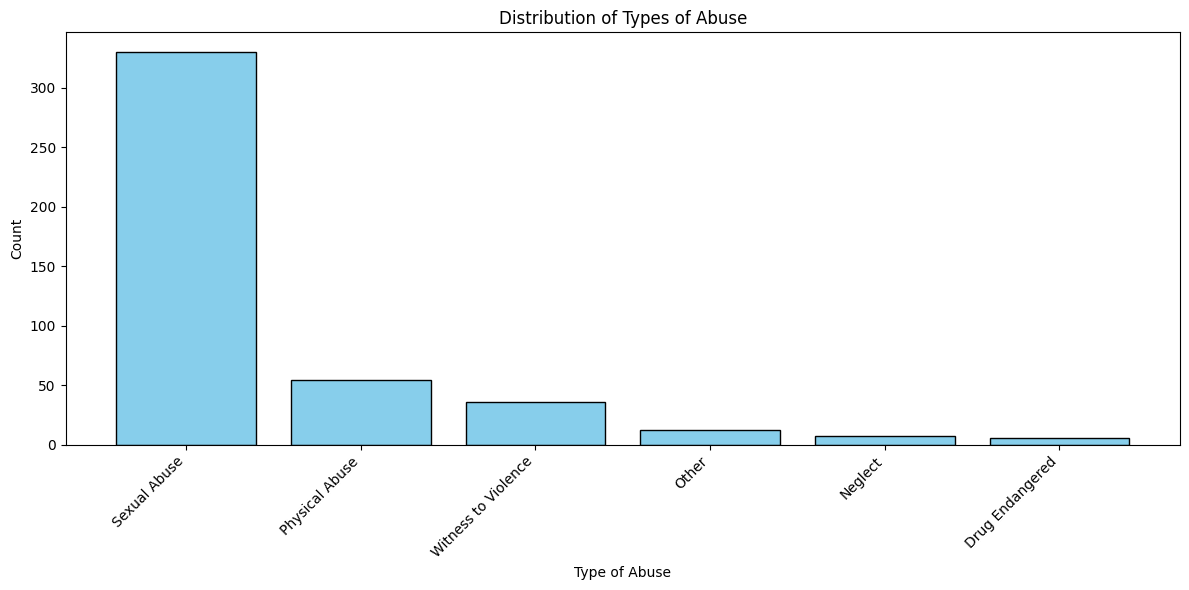

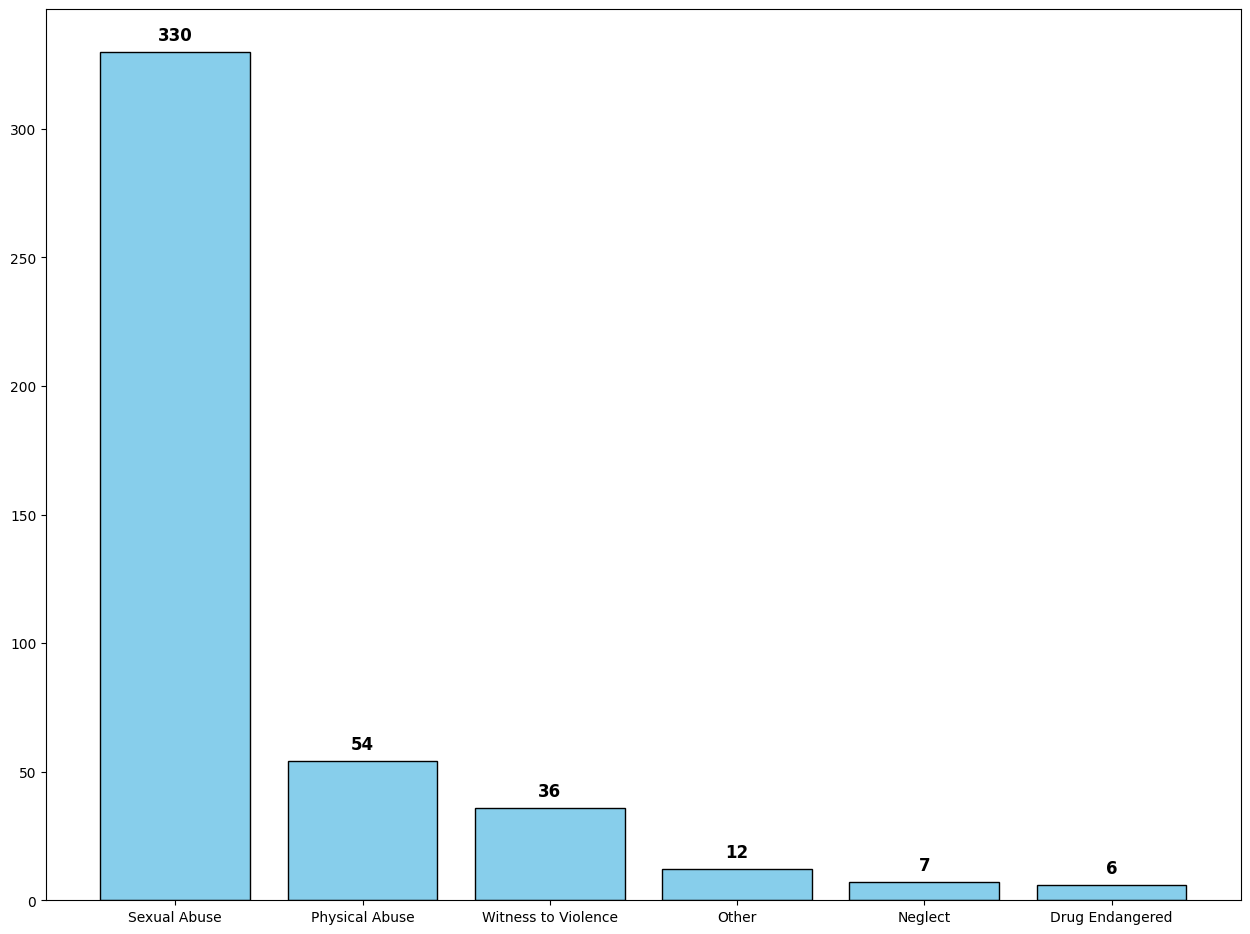

In [ ]:
# Initialize a dictionary to store counts for each unique type of abuse
abuse_counts = {}

abuse_mapping = {
    'Physical': 'Physical Abuse',
    'Physical Abuse': 'Physical Abuse',
    'Physial Abuse': 'Physical Abuse',
    'Sexual': 'Sexual Abuse',  # Standardize any other variations as needed
    # Add more mappings if other types have variations
}

# Initialize a dictionary to store counts for each unique type of abuse
abuse_counts = {}

# Split, map, and count occurrences of each type of abuse
for entry in data['Type of Abuse '].dropna():
    types = entry.split('/')  # Split by '/' for multiple types in one cell
    for abuse_type in types:
        abuse_type = abuse_type.strip()  # Remove extra spaces if any
        # Map to standard type if in abuse_mapping, otherwise keep as is
        standardized_type = abuse_mapping.get(abuse_type, abuse_type)
        if standardized_type in abuse_counts:
            abuse_counts[standardized_type] += 1
        else:
            abuse_counts[standardized_type] = 1

# Convert the counts dictionary to a DataFrame for easier plotting
abuse_counts_df = pd.DataFrame(list(abuse_counts.items()), columns=['Type of Abuse', 'Count'])
abuse_counts_df = abuse_counts_df.sort_values(by='Count', ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(abuse_counts_df['Type of Abuse'], abuse_counts_df['Count'], color='skyblue', edgecolor='black')
plt.title('Distribution of Types of Abuse')
plt.xlabel('Type of Abuse')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit labels better
plt.show()

bars = plt.bar(abuse_counts_df['Type of Abuse'], abuse_counts_df['Count'], color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval + 3,  # Adjust yval for more spacing above bar
        int(yval),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout(pad=1.5, w_pad=0.9, h_pad=4.0, rect=[0, 0, 2, 2])
plt.show()

MORE ANALYSIS TO FOLLOW BASED ON THE GOVERNMENT HIGHER LEVEL DATA.